In [1]:
import jersey_colors as jc
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# jc contains useful functions for creating leagues and calculating contrast.
# Below, I will create leagues of variable size and contrast values, and plot resulting contrast.
# The goal will be to plot heatmaps per color-assignment method (one showing min contrast of 
# matchups and one showing mean contrast of matchups) as a function of both league size and input contrast value (contrast
# a between a team's two assigned jersey colors).


In [18]:
# First assignment method: even spacing, using provided contrast value

# Initialize dataframe with NaNs, of dimensions for num_teams and jersey contrast that I want to examine
df_leagues1_min_graph = pd.DataFrame(0, index=range(10, 41), columns=range(10, 181))
df_leagues1_mean_graph = pd.DataFrame(0.0, index=range(10, 41), columns=range(10, 181))

# Examining league sizes of [10, 40] teams
for i in range(10, 41):
    # Examining contrast values (between a team's two jerseys) of [1, 180] degrees
    for j in range(10, 181):
        league = jc.create_league_contrast_even_spacing(i, j)
        league_contrast = jc.league_contrast(league)
        min = int(league_contrast['contrast'].min())
        mean = league_contrast['contrast'].mean()
        df_leagues1_min_graph.at[i, j] = min
        df_leagues1_mean_graph.at[i, j] = mean

df_leagues1_min_graph = df_leagues1_min_graph.copy()
df_leagues1_mean_graph = df_leagues1_mean_graph.copy()
df_leagues1_min_graph.head(45)
df_leagues1_mean_graph.head(45)

,10,11,12,13,14,15,16,17,18,19,...,171,172,173,174,175,176,177,178,179,180
10,108.888889,109.777778,110.666667,111.555556,112.444444,113.333333,114.222222,115.111111,116.000000,116.888889,...,136.000000,135.555556,135.111111,134.666667,134.222222,133.777778,133.333333,132.888889,132.444444,132.000000
11,108.181818,109.181818,110.181818,111.181818,112.181818,113.181818,114.181818,114.927273,115.527273,116.127273,...,134.509091,134.109091,133.709091,133.309091,132.909091,132.509091,132.109091,131.709091,131.309091,130.909091
12,107.272727,108.181818,109.090909,110.000000,110.909091,111.818182,112.727273,113.636364,114.545455,115.454545,...,135.818182,135.272727,134.727273,134.181818,133.636364,133.090909,132.545455,132.000000,131.454545,130.909091
13,106.923077,107.923077,108.923077,109.923077,110.871795,111.538462,112.205128,112.871795,113.538462,114.205128,...,136.038462,135.538462,135.038462,134.538462,134.038462,133.538462,133.038462,132.538462,132.038462,131.538462
14,106.153846,107.076923,108.000000,108.923077,109.846154,110.769231,111.692308,112.615385,113.538462,114.461538,...,136.681319,136.219780,135.758242,135.296703,134.835165,134.373626,133.912088,133.450549,132.989011,132.527473
15,106.000000,107.000000,108.000000,108.714286,109.428571,110.142857,110.857143,111.571429,112.285714,113.000000,...,135.857143,135.428571,135.000000,134.571429,134.142857,133.714286,133.285714,132.857143,132.428571,132.000000
16,105.333333,106.266667,107.200000,108.133333,109.066667,110.000000,110.933333,111.866667,112.800000,113.733333,...,136.800000,136.266667,135.733333,135.200000,134.666667,134.133333,133.600000,133.066667,132.533333,132.000000
17,105.294118,106.191176,106.941176,107.691176,108.441176,109.191176,109.941176,110.691176,111.441176,112.191176,...,136.852941,136.352941,135.852941,135.352941,134.852941,134.352941,133.852941,133.352941,132.852941,132.352941
18,104.705882,105.647059,106.588235,107.529412,108.470588,109.411765,110.352941,111.294118,112.235294,113.176471,...,137.176471,136.705882,136.235294,135.764706,135.294118,134.823529,134.352941,133.882353,133.411765,132.941176
19,104.619883,105.397661,106.175439,106.953216,107.730994,108.508772,109.286550,110.064327,110.842105,111.678363,...,136.660819,136.187135,135.742690,135.298246,134.853801,134.409357,133.964912,133.520468,133.076023,132.631579


In [12]:
# Second assignment method: random spacing, using provided contrast value
# Note that this method has variable performance due to randomness.

# Initialize dataframe with NaNs, of dimensions for num_teams and jersey contrast that I want to examine
df_leagues2_min_graph = pd.DataFrame(0, index=range(10, 41),columns=range(10, 181))
df_leagues2_mean_graph = pd.DataFrame(0.0, index=range(10, 41),columns=range(10, 181))

# Examining league sizes of [10, 40] teams
for i in range(10,41):
    # Examining contrast values (between a team's two jerseys) of [1, 180] degrees
    for j in range(10, 181):
        league = jc.create_league_contrast_random_spacing(i, j)
        league_contrast = jc.league_contrast(league)
        min = int(league_contrast['contrast'].min())
        mean = league_contrast['contrast'].mean()
        df_leagues2_min_graph.at[i, j] = min
        df_leagues2_mean_graph.at[i, j] = mean

df_leagues2_min_graph = df_leagues2_min_graph.copy()
df_leagues2_mean_graph = df_leagues2_mean_graph.copy()
df_leagues2_min_graph.head(45)
df_leagues2_mean_graph.head(45)

In [4]:
# Third assignment method: random spacing, random contrast#
# Note that this method has variable performance due to randomness.

leagues3_min = []
leagues3_mean = []

df_leagues3_min_graph = pd.DataFrame(0, index=range(10, 41), columns=['num_teams', 'min_matchup_contrast'])
df_leagues3_mean_graph = pd.DataFrame(0.0, index=range(10, 41), columns=['num_teams', 'mean_matchup_contrast'])

# Examining league sizes of [10, 40] teams
for i in range(10,41):
    league = jc.create_league_true_random(i)
    league_contrast = jc.league_contrast(league)
    min = int(league_contrast['contrast'].min())
    mean = league_contrast['contrast'].mean()
    df_leagues3_min_graph.at[i, 'num_teams'] = i
    df_leagues3_min_graph.at[i, 'min_matchup_contrast'] = min
    df_leagues3_mean_graph.at[i, 'num_teams'] = i
    df_leagues3_mean_graph.at[i, 'mean_matchup_contrast'] = mean
    
df_leagues3_min_graph = df_leagues3_min_graph.copy()
df_leagues3_mean_graph = df_leagues3_mean_graph.copy()
df_leagues3_min_graph.head(45)
df_leagues3_mean_graph.head(45)

<AxesSubplot:>

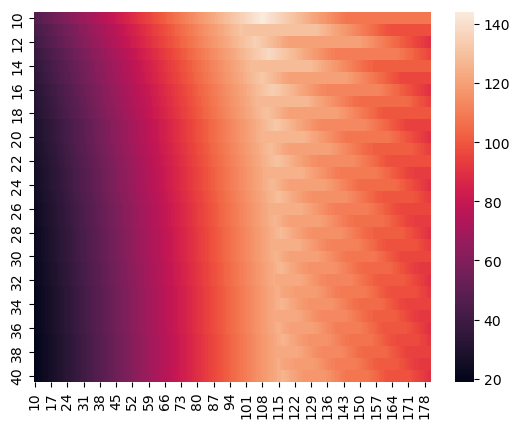

In [13]:
# First assignment method: even spacing, using provided contrast value
# mean

sns.heatmap(data=df_leagues1_min_graph)

<AxesSubplot:>

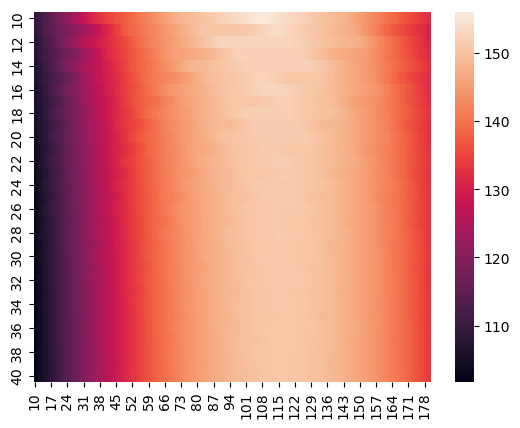

In [14]:
sns.heatmap(data=df_leagues1_mean_graph)

<AxesSubplot:>

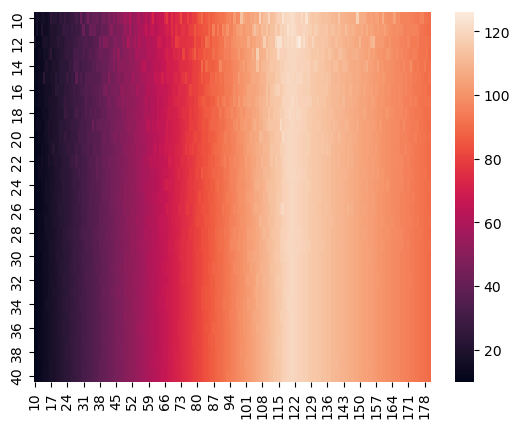

In [15]:
sns.heatmap(data=df_leagues2_min_graph)

<AxesSubplot:>

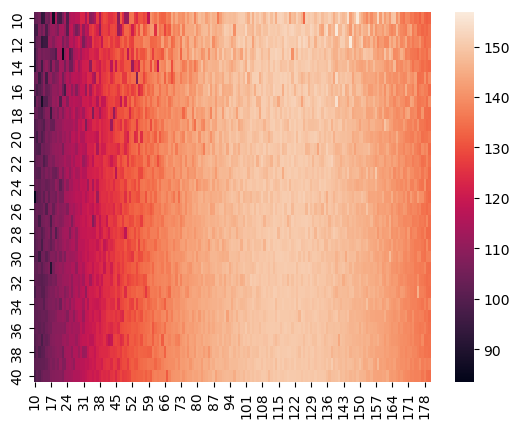

In [16]:
sns.heatmap(data=df_leagues2_mean_graph)

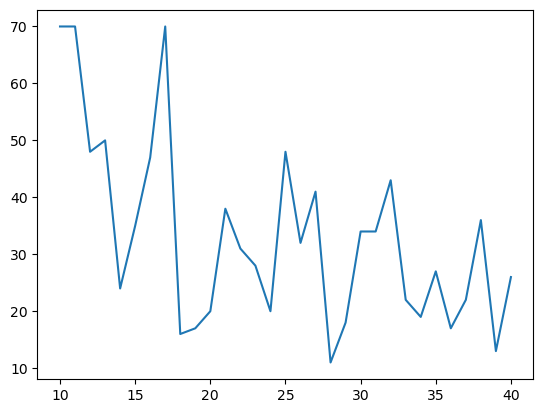

In [33]:
plt.plot(df_leagues3_min_graph['num_teams'].values, df_leagues3_min_graph['min_matchup_contrast'].values)

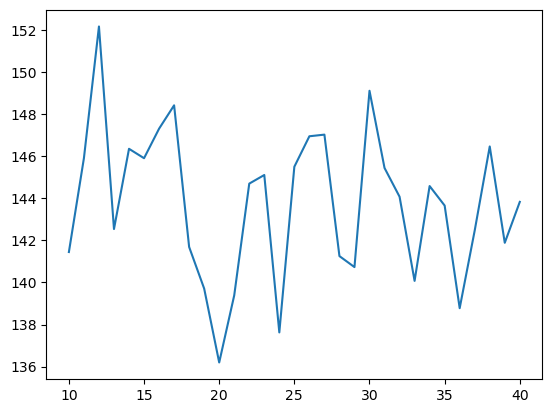

In [34]:
plt.plot(df_leagues3_mean_graph['num_teams'].values, df_leagues3_mean_graph['mean_matchup_contrast'].values)

In [35]:
# Summary
# Contrast seems to peak around 115 degrees. This is true for mean and min benchmarking, although
# mean can achieve higher matchup contrast across a wider range of team contrasts.
# I use min as a best benchmark because this ensures that no matter the league schedule, all matchups
# will be able to be played with functional contrast between teams, but in practice it doesn't matter because
# the same team contrast value performed best on both scores. Also worth noting that even if a particular 
# team contrast value performed well by mean and poorly by min, that would not lead to a tangible benefit
# since contrast above ~120 degrees does not significantly improve a persons ability to distinguish between
# colors, but that gets into a larger discussion of color (see README).
# Using random assignment simply introduces variance, with lower variances in leagues of larger sizes.